In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
acidentes_clima_df = pd.read_csv('../output/rodovias/acidentes_com_estacoes_climaticas.csv')
acidentes_clima_gdf = gpd.GeoDataFrame(acidentes_clima_df, geometry=gpd.points_from_xy(acidentes_clima_df.longitude, acidentes_clima_df.latitude))
acidentes_clima_df = acidentes_clima_df.drop_duplicates()
print(acidentes_clima_df.columns)
print(acidentes_clima_df.info())

Index(['n_da_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente',
       'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros',
       'tracao_animal', 'transporte_de_cargas_especiais', 'trator_maquinas',
       'utilitarios', 'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos', 'concessionaria', 'data_hora',
       'com_vitima', 'estado', 'ano', 'mes', 'latitude', 'longitude',
       'geometry', 'regiao', 'codigo_estacao', 'nome_estacao', 'lat', 'long',
       'alt', 'data_fundacao', 'nome_arquivo', 'distance', 'Data', 'Hora UTC',
       'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (A

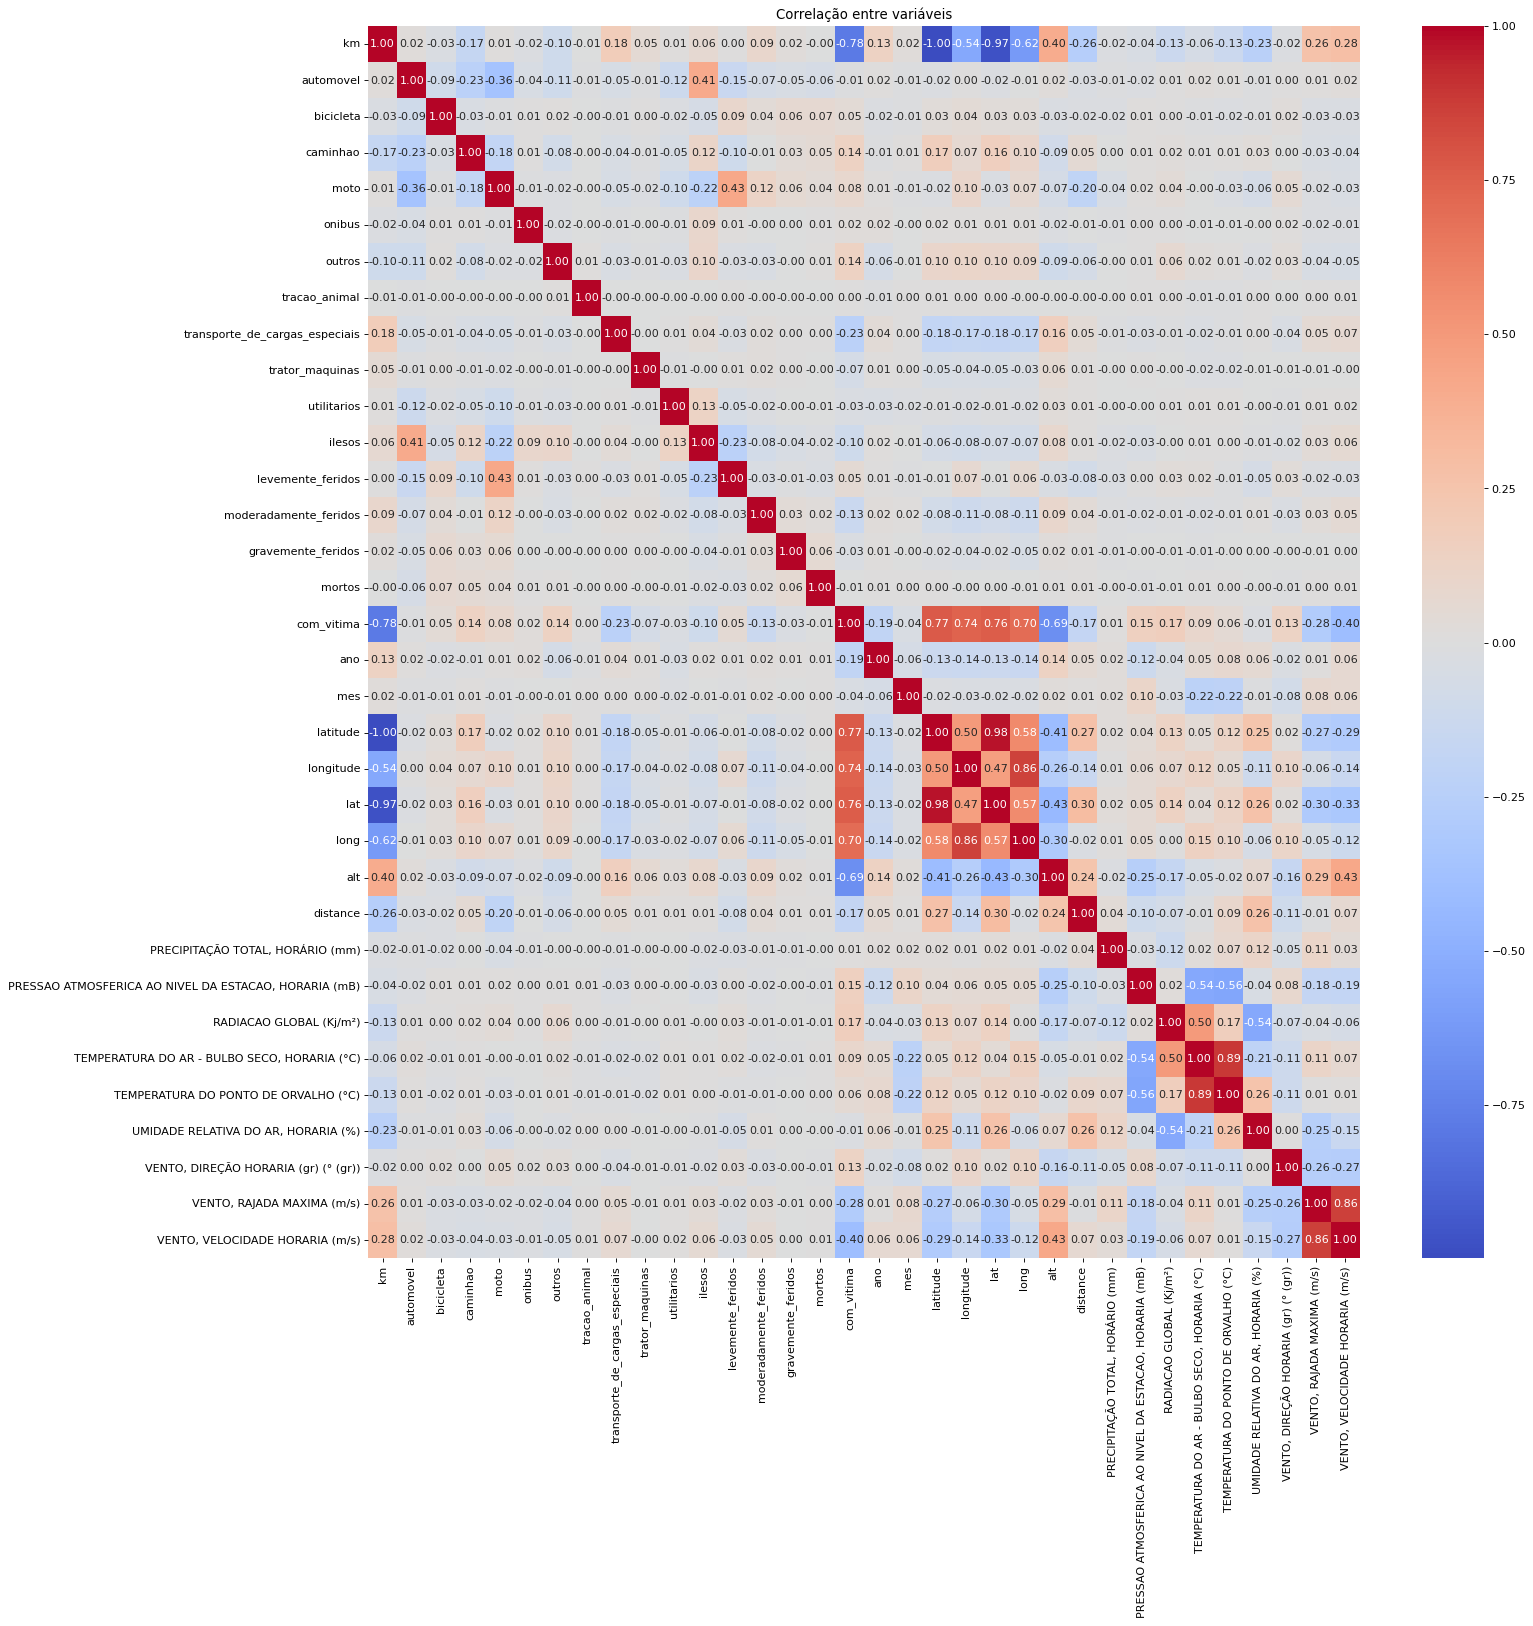

In [3]:
columns_to_select = [
    'km', 'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros',
    'tracao_animal', 'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios',
    'ilesos', 'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos', 'mortos',
    'com_vitima', 'ano', 'mes', 'latitude', 'longitude', 'lat',
    'long', 'alt', 'distance', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)',
]

for col in columns_to_select:
    if col in acidentes_clima_df.columns and acidentes_clima_df[col].dtype == 'object' or ',' in acidentes_clima_df[col].values:
        acidentes_clima_df[col] = acidentes_clima_df[col].str.replace(',', '.').astype(float)

selecao_df = acidentes_clima_df[[col for col in columns_to_select if col in acidentes_clima_df.columns]]

fig, ax = plt.subplots(figsize=(20, 20), dpi=80)

correlation = selecao_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax, fmt=".2f")
plt.title('Correlação entre variáveis')
fig.savefig('../output/correlacao_acidentes_clima.png')

In [4]:
pista_gdf = gpd.read_file('../data/DATA_FUSION/data/relevantes/BR-101-SC/pista_principal_br101sc.csv')
pista_gdf.head()

,concessionaria,ano_do_pnv_snv,rodovia,sentido,latitude,longitude,km,geometry
0,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.981624,-48.886367,0.0,None
1,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98179,-48.88623,0.1,None
2,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98257,-48.88572,0.2,None
3,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98341,-48.88536,0.3,None
4,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98428,-48.88514,0.4,None


In [5]:
relevante_df = acidentes_clima_df[[
    'ilesos', 
    'levemente_feridos', 
    'moderadamente_feridos',
    'gravemente_feridos',
    'mortos', 
    'com_vitima',
    'ano',
    'mes',
    'latitude',
    'longitude',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Data'
    ]]


print(relevante_df.info())

for col in relevante_df.columns:
    if ',' in relevante_df[col].values:
        relevante_df[col] = relevante_df[col].str.replace(',', '.').astype(float)

print(relevante_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59209 entries, 0 to 59212
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ilesos                                        59209 non-null  int64  
 1   levemente_feridos                             59209 non-null  int64  
 2   moderadamente_feridos                         59209 non-null  int64  
 3   gravemente_feridos                            59209 non-null  int64  
 4   mortos                                        59209 non-null  int64  
 5   com_vitima                                    59209 non-null  bool   
 6   ano                                           59209 non-null  int64  
 7   mes                                           59209 non-null  int64  
 8   latitude                                      59209 non-null  float64
 9   longitude                                     59209 non-null  floa

In [6]:
precipitacao_latlog_df = relevante_df[['latitude', 'longitude', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'Data', 'ano', 'mes']] 
temperatura_latlog_df = relevante_df[['latitude', 'longitude', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'Data']]

acidentes_df = relevante_df[['latitude', 'longitude', 'mortos', 'Data', 'ano', 'mes']]
acidentes_gdf = gpd.GeoDataFrame(acidentes_df, geometry=gpd.points_from_xy(acidentes_df.longitude, acidentes_df.latitude))

/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


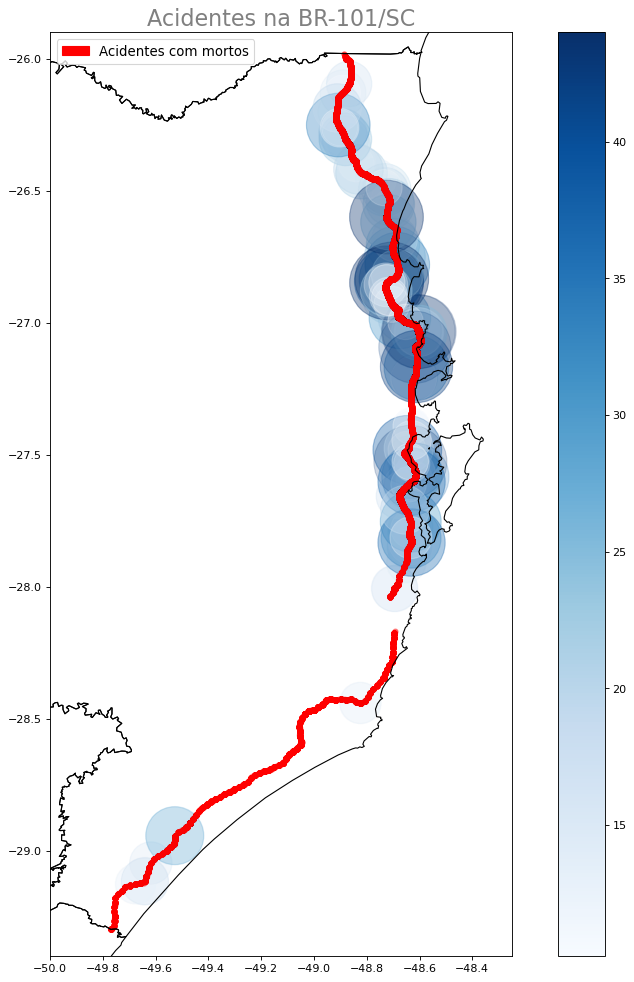

In [7]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
background = gpd.read_file(url)

fig, ax = plt.subplots(figsize=(15, 15), dpi=80)
background.boundary.plot(ax=ax, linewidth=1, color='black')  # Plota as bordas dos estados
background.plot(ax=ax, color='white')  # Plota os estados


acidentes_clima_gdf = gpd.GeoDataFrame(precipitacao_latlog_df, geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude))
acidentes_clima_gdf = acidentes_clima_gdf[acidentes_clima_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 10]
acidentes_clima_gdf.plot(column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                             ax=ax,
                             legend=True,
                             cmap='Blues',
                             markersize=acidentes_clima_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
                             alpha=0.2)

acidentes_gdf.plot(ax=ax, color='red', alpha=0.2, markersize=20, marker='o')

acidentes_patch = mpatches.Patch(color='red', label='Acidentes com mortos')
#pista_patch = mpatches.Patch(color='darkred', label='BR-101/SC')

plt.legend(handles=[acidentes_patch], fontsize=12, loc='best')

plt.ylim(-29.4, -25.9)
plt.xlim(-50, -48.25)
plt.title('Acidentes na BR-101/SC', fontsize=20, color='gray')
plt.show()

/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


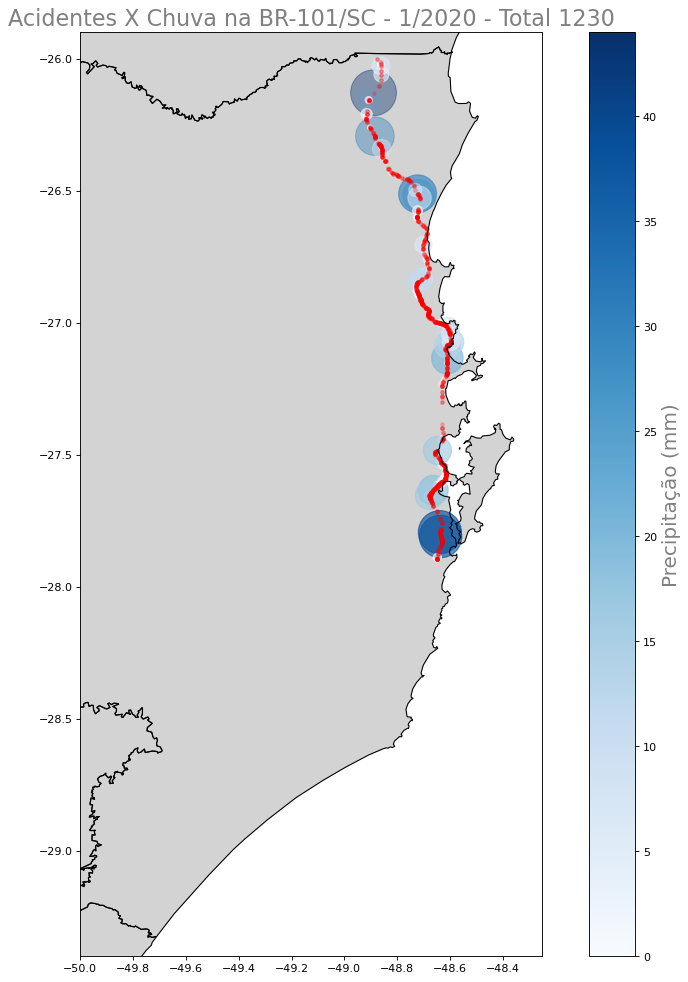

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

def plot_frame(frame, ax, precipitacao_gdf, acidentes_gdf, background, norm, sm):
    ax.clear()
    mes, ano = mes_ano_pares[frame]  # mês e ano atual
    
    # Plotando os estados do Brasil
    background.boundary.plot(ax=ax, linewidth=1, color='black') 
    background.plot(ax=ax, color='lightgray') 
    
    # Filtrando dados para o mês e ano
    precipitacao_mes = precipitacao_gdf[(precipitacao_gdf['mes'] == mes) & (precipitacao_gdf['ano'] == ano)]
    acidentes_mes = acidentes_gdf[(acidentes_gdf['mes'] == mes) & (acidentes_gdf['ano'] == ano)]
    
    # Plotando precipitação
    if not precipitacao_mes.empty:
        precipitacao_mes = precipitacao_mes[precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0]
        precipitacao_mes.plot(
            column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
            ax=ax,
            cmap='Blues',
            markersize=precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
            alpha=0.4,
        )
    
    # Plotando acidentes
    if not acidentes_mes.empty:
        acidentes_mes.plot(
            ax=ax, 
            color='red', 
            alpha=0.2, 
            markersize=10,
            marker='o',
        )
    
    # Configurações do gráfico
    plt.ylim(-29.4, -25.9)
    plt.xlim(-50, -48.25)
    plt.title(f'Acidentes X Chuva na BR-101/SC - {mes}/{ano} - Total {len(acidentes_mes)}', fontsize=20, color='gray')

# Lendo os dados do mapa
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

precipitacao_latlog_gdf = gpd.GeoDataFrame(
    precipitacao_latlog_df, geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude)
).sort_values(['ano', 'mes'])
acidentes_gdf = gpd.GeoDataFrame(
    acidentes_df, geometry=gpd.points_from_xy(acidentes_df.longitude, acidentes_df.latitude)
).sort_values(['ano', 'mes'])

mes_ano_pares = acidentes_gdf[['mes', 'ano']].drop_duplicates().sort_values(['ano', 'mes']).to_records(index=False)

# Configurando o plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=80)

# Adicionando a barra de cores para precipitação
norm = mpl.colors.Normalize(vmin=precipitacao_latlog_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].min(),
                            vmax=precipitacao_latlog_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].max())
sm = mpl.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", label="Precipitação (mm)")
cbar.ax.yaxis.label.set_size(18)
cbar.ax.yaxis.label.set_color('gray')

# Adicionando uma legenda fixa
red_patch = mpatches.Patch(color='red', label='Acidentes')
ax.legend(handles=[red_patch], fontsize=16, loc='upper left')

# Criando a animação
frames = len(mes_ano_pares)
ani = FuncAnimation(
    fig, plot_frame, fargs=(ax, precipitacao_latlog_gdf, acidentes_gdf, br_states, norm, sm),
    frames=frames, interval=1000, repeat=True
)

# Salvar ou exibir a animação
from matplotlib.animation import PillowWriter
ani.save("../output/animacao_acidentes_precipitacao.gif", writer=PillowWriter(fps=1))


/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


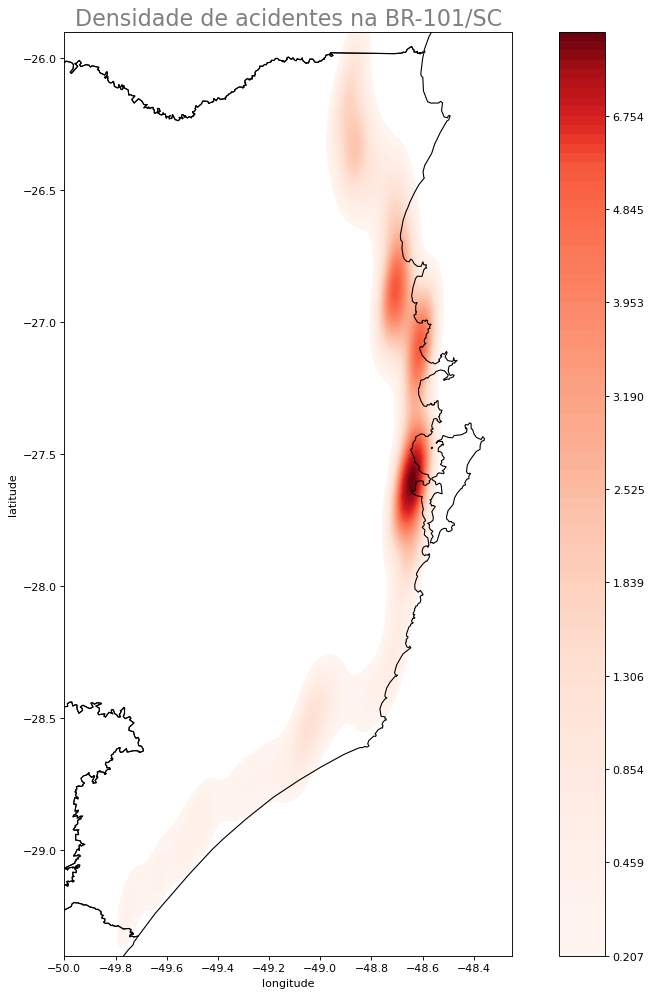

In [9]:
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

fig, ax = plt.subplots(figsize=(15, 15), dpi=80)
br_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Plota as bordas dos estados
br_states.plot(ax=ax, color='white')  # Plota os estados

sns.kdeplot(data=acidentes_gdf, x='longitude', y='latitude', fill=True, levels=100, cmap='Reds', ax=ax, cbar=True, legend=True)

plt.ylim(-29.4, -25.9)
plt.xlim(-50, -48.25)
plt.title('Densidade de acidentes na BR-101/SC', fontsize=20, color='gray')
plt.show()

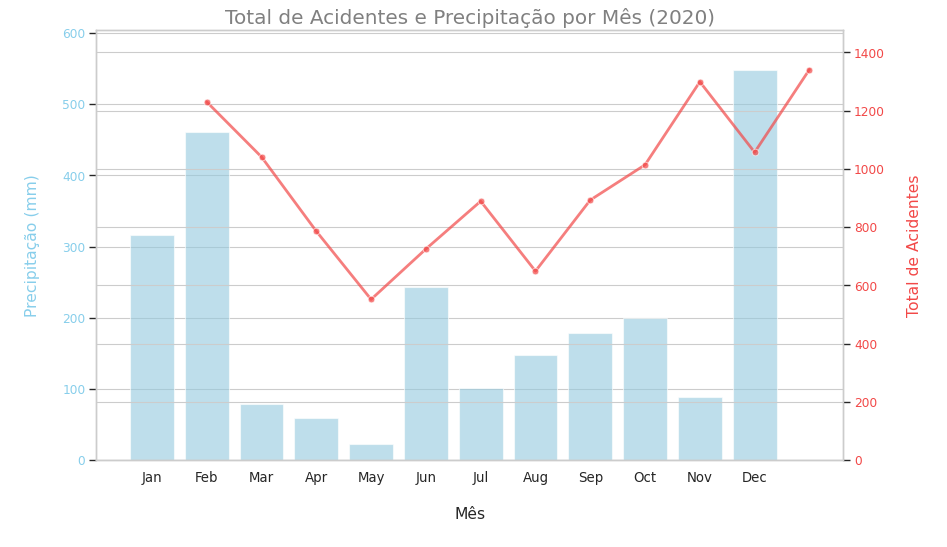

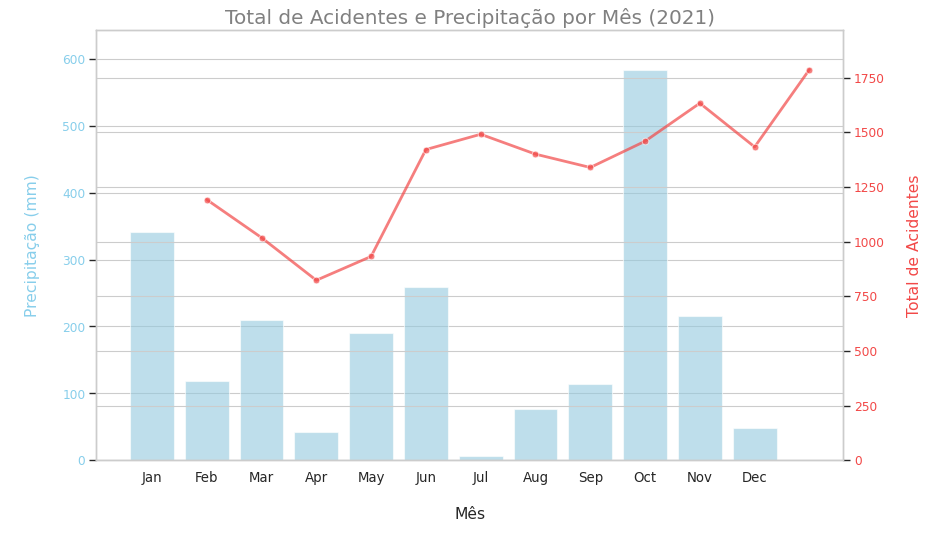

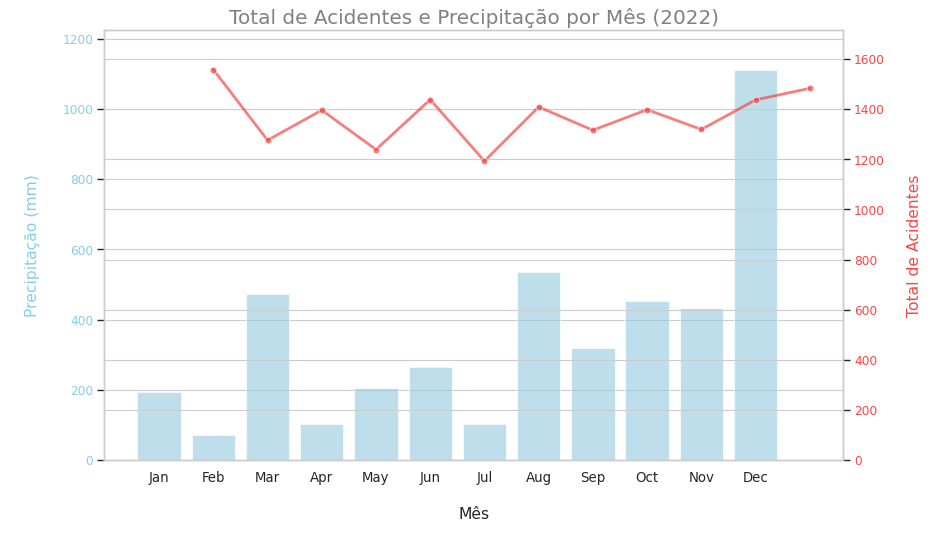

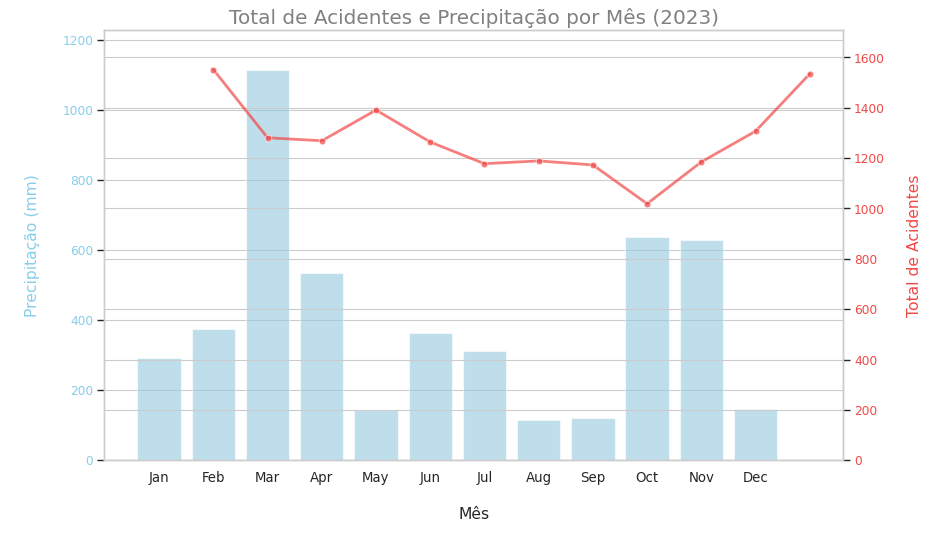

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

acidentes_group = acidentes_df.groupby(['ano', "mes"]).count().reset_index()
precitacao_group = precipitacao_latlog_df.groupby(['ano', "mes"]).sum().reset_index()

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid")

# Plotando os gráficos
for ano in acidentes_group['ano'].unique():
    fig, ax1 = plt.subplots(figsize=(12, 7), dpi=80)

    # Dados do ano atual
    acidentes_ano = acidentes_group[acidentes_group['ano'] == ano]
    precitacao_ano = precitacao_group[precitacao_group['ano'] == ano]

    # Barras para precipitação
    sns.barplot(
        data=precitacao_ano,
        x="mes",
        y="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",
        color="skyblue",
        alpha=0.6,
        ax=ax1
    )
    ax1.set_ylabel("\nPrecipitação (mm)\n", fontsize=14, color="skyblue")
    ax1.tick_params(axis="y", labelcolor="skyblue")
    ax1.set_ylim(0, precitacao_ano["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].max() * 1.1)

    # Linha para acidentes
    ax2 = ax1.twinx()
    sns.lineplot(
        data=acidentes_ano,
        x="mes",
        y="Data",  # Ajustado para o campo correto
        color="#f24847",
        alpha= 0.7,
        marker='o',
        linewidth=2.5,
        markersize=6,
        ax=ax2
    )
    ax2.set_ylabel("\nTotal de Acidentes\n", fontsize=14, color="#f24847")
    ax2.tick_params(axis="y", labelcolor="#f24847")
    ax2.set_ylim(0, acidentes_ano["Data"].max() * 1.1)

    # Personalização do eixo X
    ax1.set_xticks(range(1,13))
    ax1.set_xticklabels(
        ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        fontsize=12,
        rotation=0,
        ha='center'
    )
    ax1.set_xlabel("\nMês\n", fontsize=14)

    # Título
    plt.title(f"Total de Acidentes e Precipitação por Mês ({ano})", fontsize=18, color="gray")

    # Remover a legenda automática no eixo secundário

    plt.tight_layout()
    plt.show()


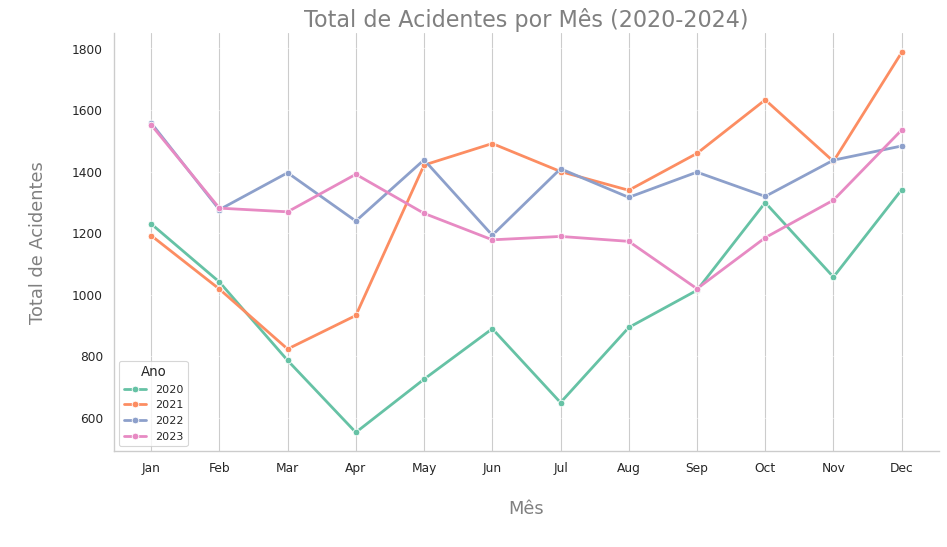

In [11]:

fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
ax = sns.lineplot(data=acidentes_group, x="mes", y="Data", hue="ano", marker='o', palette="Set2", linewidth=2.5, markersize=6)


# Personalização do gráfico
plt.grid(axis='y', color='white', alpha=0.5)

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

plt.title("Total de Acidentes por Mês (2020-2024)", fontsize=20, color='gray')
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("\nMês\n", fontsize=16, color='gray')
plt.ylabel("\nTotal de Acidentes\n", fontsize=16, color='gray')
plt.legend(title="Ano", fontsize=10)
plt.tight_layout()
plt.show()